# Multi-Layer Perceptron

In [3]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
#https://www.pluralsight.com/guides/building-your-first-pytorch-solution

## Data normalization

In [12]:
img_size = 224

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((img_size, img_size)),
                                transforms.Normalize((0.5,), (0.5,))])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading data

torch.Size([224, 224, 3, 32])
torch.Size([32])


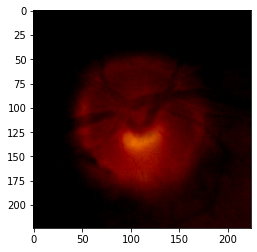

In [13]:
def load_test_train_data():
  train_dataset = torchvision.datasets.ImageFolder(
      r'/content/drive/MyDrive/Maestría/Cursos/Deep Learning/TP/TP1/dataset_train_test/train',
      transform = transform)
  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

  test_dataset = torchvision.datasets.ImageFolder(
      r'/content/drive/MyDrive/Maestría/Cursos/Deep Learning/TP/TP1/dataset_train_test/test',
      transform = transform)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

  return train_loader, test_loader

train_loader, test_loader = load_test_train_data()
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.T.shape)
print(labels.shape)
plt.imshow(images[0].T.numpy().squeeze());

torch.Size([64, 1, 150, 150])
torch.Size([64])


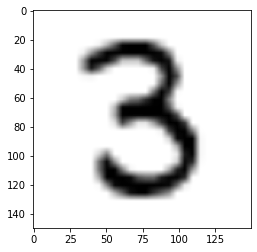

In [ ]:
def load_test_train_data_MNIST():
    trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

    testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
    return trainloader, testloader

trainloader, testloader = load_test_train_data_MNIST()
dataiter = iter(trainloader) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

print(images.shape)
print(labels.shape)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

## Create Multi-layer perceptron network model

In [16]:
def create_MLP_model():
    model=nn.Sequential(
        nn.Linear(img_size*img_size*3,2000),
        nn.Sigmoid(),
        nn.Linear(2000,300),
        nn.Sigmoid(),
        nn.Linear(300,32),
        nn.Sigmoid(),
        nn.Linear(32,2),
        nn.LogSoftmax(dim=1))
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Running on device: ", device)
mlp_model = create_MLP_model()

#moving models to device
mlp_model.to(device)
#create error criterion
criterion = nn.NLLLoss() 
print("MLP model")
print(mlp_model)


Running on device:  cuda
MLP model
Sequential(
  (0): Linear(in_features=150528, out_features=2000, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2000, out_features=300, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=300, out_features=32, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=32, out_features=2, bias=True)
  (7): LogSoftmax(dim=1)
)


## Train model

In [19]:
def train_model(model, criterion, epochs = 15, lr = 0.1):

    time0 = time()    
    running_loss_list= []
    epochs_list = []
    optimizer = optim.SGD(model.parameters(), lr= lr, momentum=0.9)
    for e in range(epochs):
        running_loss = 0
        
        #go for every batch
        for images, labels in train_loader:
            #move data to specific device
            images = images.to(device)
            labels = labels.to(device)
            # Flatenning MNIST images with size [64,784] (for MLP)
            
            print(images.shape)
            images = images.view(images.shape[0], -1) 
            
            # defining gradient in each epoch as 0
            optimizer.zero_grad()            
            # modeling for each image batch
            output = model(images)

            # calculating the loss
            loss = criterion(output, labels)

            # This is where the model learns by backpropagating
            loss.backward()

            # And optimizes its weights here
            optimizer.step()

            # calculating the loss
            running_loss += loss.item()

        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
    print("\nTraining Time (in minutes) =",(time()-time0)/60)
    return model

print("Training MLP model")
mlp_model = train_model(mlp_model, criterion, epochs = 15, lr = 0.01)

Training MLP model
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([15, 3, 224, 224])
Epoch 0 - Training loss: 0.6735212057828903
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.S

## Test model

In [21]:
def test_model_mlp(test_loader, model):
    correct_count, all_count = 0, 0
    for images,labels in test_loader:
      #move data to specific device
      images = images.to(device)
      labels = labels.to(device)
      for i in range(len(labels)):
        img = images[i].view(1, img_size*img_size*3)
        #evaluate model with no grad
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        #get predicted label
        pred_label = probab.index(max(probab))
        true_label = labels.cpu().numpy()[i]
        if(true_label == pred_label):
          correct_count += 1
        all_count += 1

    print("Number Of Images Tested =", all_count)
    print("Number Of Correct Tests =", correct_count)
    print("\nModel Accuracy =", (correct_count/all_count))





print("Testing MLP model")
test_model_mlp(test_loader, mlp_model)

Testing MLP model
Number Of Images Tested = 210
Number Of Correct Tests = 178

Model Accuracy = 0.8476190476190476
